In [1]:
import calour as ca
ca.set_log_level(20)
%matplotlib notebook

In [3]:
dat=ca.read_amplicon('./all.withtax.biom','./map.txt',normalize=10000, min_reads=1000)

2017-08-23 17:16:06 INFO loaded 140 samples, 43716 observations
2017-08-23 17:16:07 INFO 140 remaining


In [4]:
datc=dat.cluster_features(10)

2017-08-23 17:16:10 INFO 1094 remaining


In [5]:
datc.sample_metadata.columns

Index(['#SampleID', 'BioSample_s', 'Experiment_s', 'MBases_l', 'MBytes_l',
       'Run_s', 'SRA_Sample_s', 'Sample_Name_s', 'host_body_site_s',
       'miscellaneous_parameter_s', 'disease', 'day', 'Assay_Type_s',
       'AvgSpotLen_l', 'BioProject_s', 'Center_Name_s', 'Consent_s',
       'InsertSize_l', 'Instrument_s', 'LibraryLayout_s', 'LibrarySelection_s',
       'LibrarySource_s', 'Library_Name_s', 'LoadDate_s', 'Organism_s',
       'Platform_s', 'ReleaseDate_s', 'SRA_Study_s', 'collection_date_s',
       'environment_biome_s', 'environment_feature_s',
       'environment_material_s', 'environmental_package_s',
       'geographic_location_country_and_or_sea_s',
       'geographic_location_latitude_s', 'geographic_location_longitude_s',
       'host_common_name_s', 'host_diet_s', 'host_sex_s', 'host_taxid_s',
       'investigation_type_s', 'library_construction_method_s',
       'nucleic_acid_extraction_s', 'project_name_s',
       'sample_storage_temperature_s', 'sequencing_method

In [6]:
datc=datc.sort_samples('host_body_site_s').sort_samples('day').sort_samples('disease')

<IPython.core.display.Javascript object>


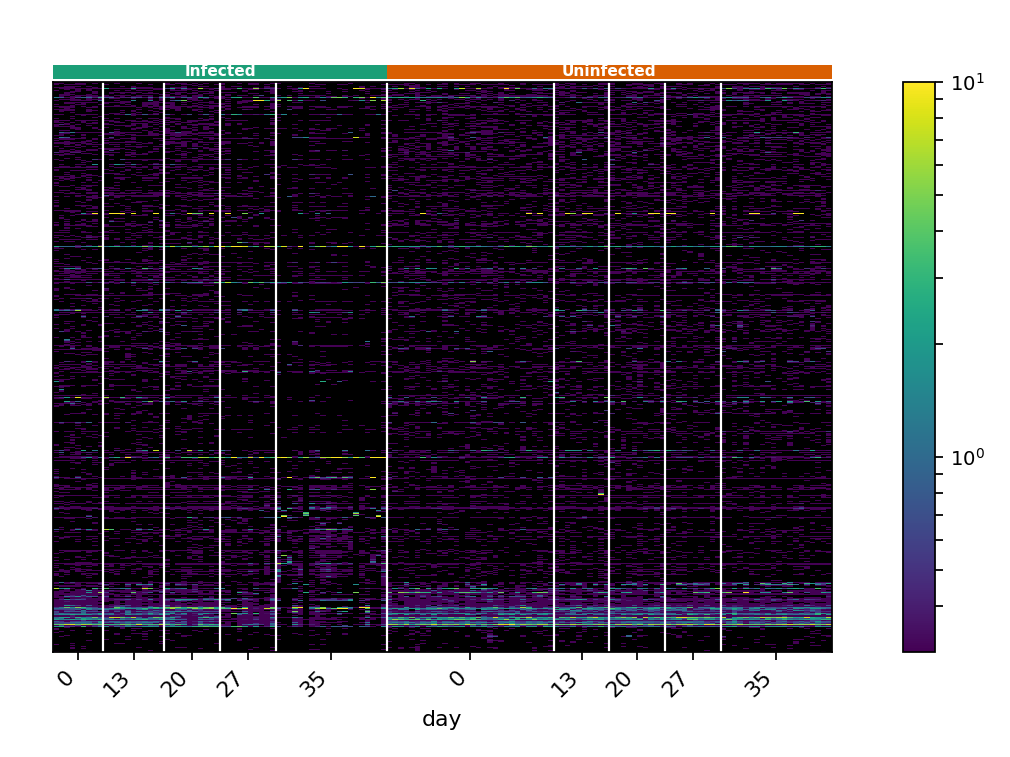

In [17]:
f = datc.normalize(100, axis='s').plot(sample_field='day',gui='jupyter', feature_field=None, sample_color_bars=['disease'], clim=[0,10])

In [7]:
dd=datc.diff_abundance('miscellaneous_parameter_s',['Uninfected day 0','Uninfected day 13','Uninfected day 20','Uninfected day 27','Uninfected day 35'],'Infected day 35')

2017-08-19 15:54:06 INFO 100 samples with both values
2017-08-19 15:54:06 INFO 1091 remaining
2017-08-19 15:54:06 INFO 80 samples with value 1 (['Uninfected day 0', 'Uninfected day 13', 'Uninfected day 20', 'Uninfected day 27', 'Uninfected day 35'])
2017-08-19 15:54:06 INFO method meandiff. number of higher in ['Uninfected day 0', 'Uninfected day 13', 'Uninfected day 20', 'Uninfected day 27', 'Uninfected day 35'] : 308. number of higher in ['Infected day 35'] : 121. total 429


In [8]:
dd=dd.sort_samples('host_body_site_s')

<IPython.core.display.Javascript object>


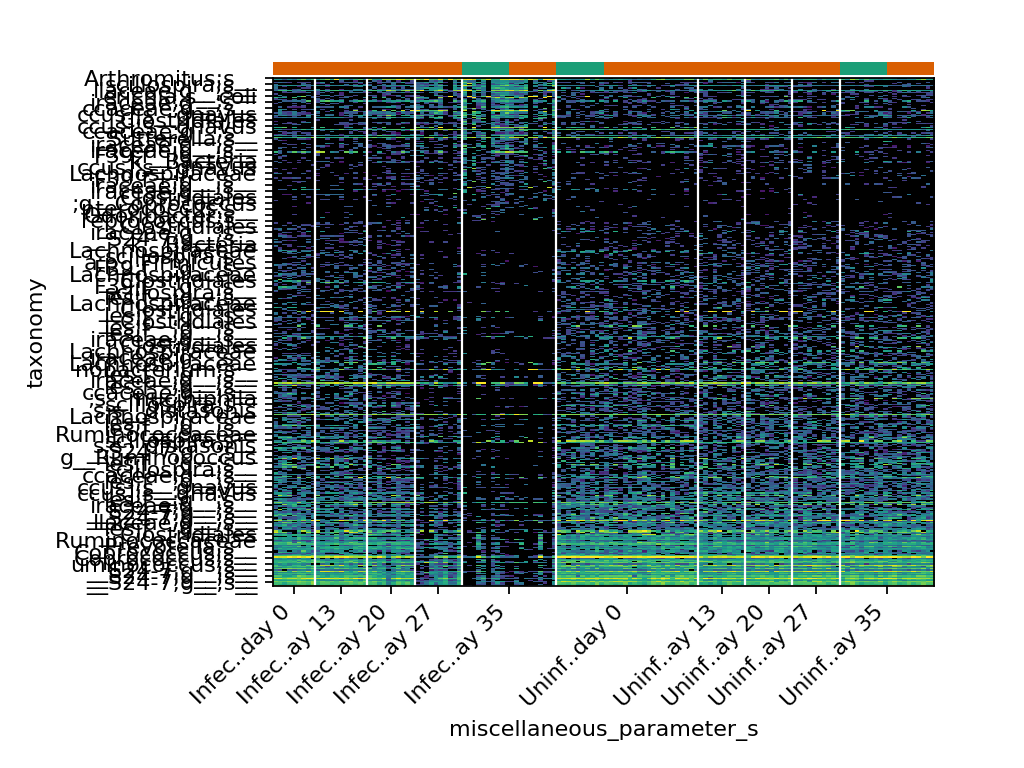

In [9]:
dd.plot_sort('miscellaneous_parameter_s',gui='jupyter',sample_color_bars=['host_body_site_s'],color_bar_label=False,
            clim=[0,1000])

# only colon

In [18]:
tt=datc.filter_samples('host_body_site_s','Colon content')

In [19]:
tt=tt.cluster_features(10)

2017-08-23 17:23:02 INFO 1005 remaining


## plot all features (fig S2A)

<IPython.core.display.Javascript object>


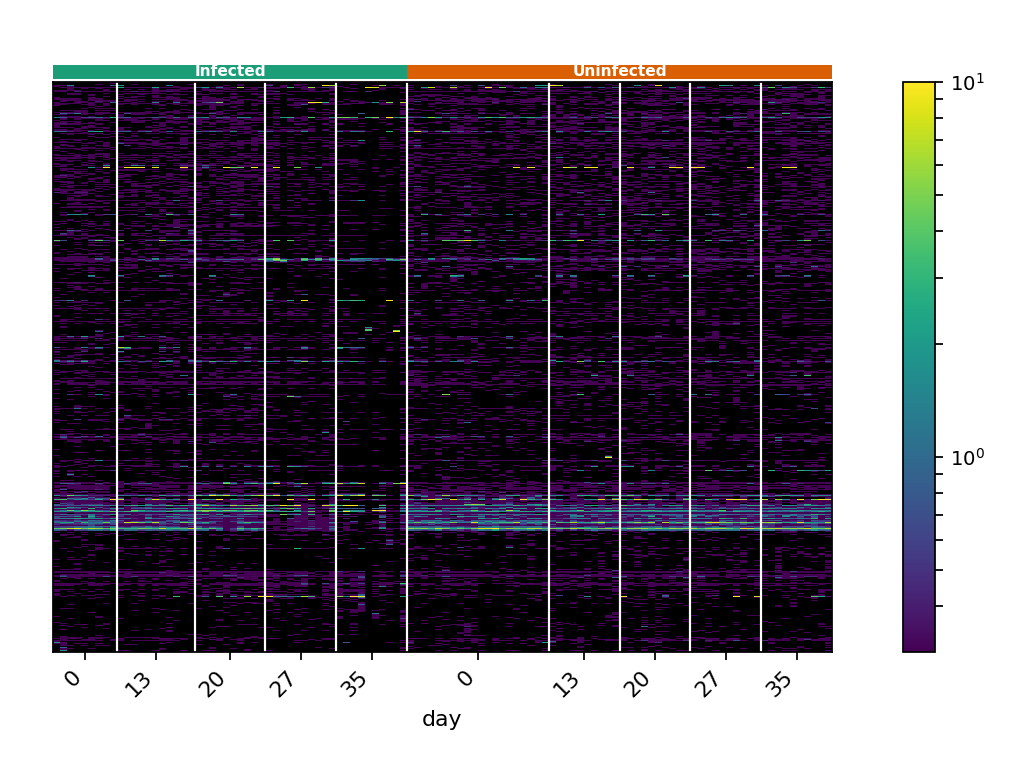

In [23]:
f=tt.normalize(100, axis='s').plot(sample_field='day',gui='jupyter', feature_field=None, sample_color_bars=['disease'], clim=[0, 10])

In [24]:
f.save_figure('figure-S2A-mouse-worm-all.pdf')

## plot differentially abundant features (fig 2A)
between healthy and infected at late timepoints

In [26]:
dd=tt.diff_abundance('miscellaneous_parameter_s',['Uninfected day 0','Uninfected day 13','Uninfected day 20','Uninfected day 27','Uninfected day 35'],'Infected day 35')

2017-08-23 17:24:44 INFO 70 samples with both values
2017-08-23 17:24:44 INFO 999 remaining
2017-08-23 17:24:44 INFO 60 samples with value 1 (['Uninfected day 0', 'Uninfected day 13', 'Uninfected day 20', 'Uninfected day 27', 'Uninfected day 35'])
2017-08-23 17:24:44 INFO method meandiff. number of higher in ['Uninfected day 0', 'Uninfected day 13', 'Uninfected day 20', 'Uninfected day 27', 'Uninfected day 35'] : 173. number of higher in ['Infected day 35'] : 51. total 224


<IPython.core.display.Javascript object>


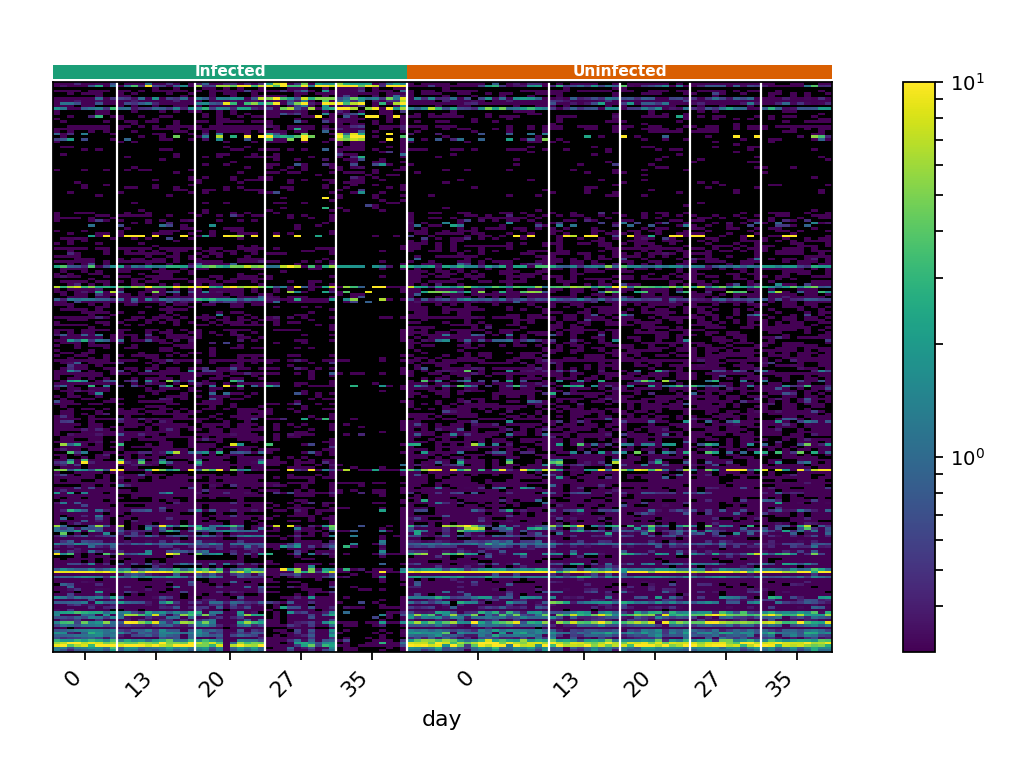

In [28]:
fig=dd.normalize(100, axis='s'). plot(sample_field='day',gui='jupyter', feature_field=None,
            sample_color_bars=['disease'])

In [29]:
fig.save_figure('figure-2A-mouse-worm-diff.pdf')

## Plot the enriched terms between the 2 groups
blue is enriched in "higher in control" group, orange is enriched in "lower in control" group

We ignore experiment 119 since this is the experiment we are analysing (don't want to get annotations from this experiment)

<IPython.core.display.Javascript object>


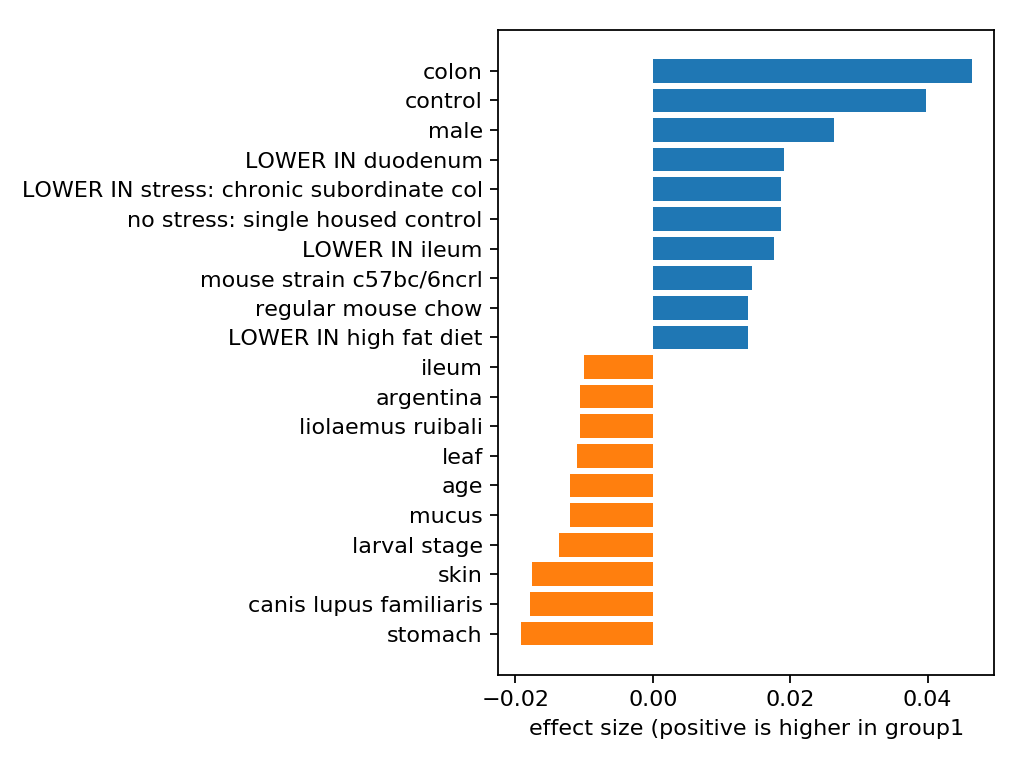

In [46]:
f, d = dd.plot_diff_abundance_enrichment(ignore_exp=[119])

In [47]:
f.savefig('figure-2C-worm-terms.pdf')